<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Softmax Regression Explained

Softmax regression, also known as multinomial logistic regression, is a generalization of logistic regression to the case where we want to classify multiple classes. While logistic regression handles binary classification (two classes), softmax regression extends this to handle *n* classes, where *n* is greater than two. It's particularly useful when the classes are mutually exclusive, meaning each data point belongs to exactly one class.

### 1. The Goal: Probability Distribution Over Classes

The primary goal of softmax regression is to output a probability distribution over the *n* possible classes for a given input. This means that for any input, the model will output *n* probabilities, one for each class, where all probabilities are between 0 and 1 and sum up to 1.

### 2. Linear Model

Like many other regression and classification models, softmax regression starts with a linear combination of input features and learned weights for each class. For each class *k* (from 1 to *n*), we compute a score, often called a 'logit'.

For an input feature vector `x` and a set of weights `W` and biases `b` (where `W` is a matrix and `b` is a vector):

`z_k = w_k^T * x + b_k`

Where:
*   `z_k` is the linear score (logit) for class *k*.
*   `w_k^T` is the transpose of the weight vector for class *k*.
*   `x` is the input feature vector.
*   `b_k` is the bias term for class *k*.

### 3. The Softmax Function

The magic happens with the softmax function, which takes these raw linear scores (`z_k`) and transforms them into a probability distribution. The formula for the softmax function for class *k* is:

`P(y=k | x) = exp(z_k) / sum(exp(z_j) for j in range(1 to n))`

Where:
*   `P(y=k | x)` is the probability that the input `x` belongs to class *k*.
*   `exp(z_k)` is the exponential of the linear score for class *k*.
*   The denominator `sum(exp(z_j))` is the sum of the exponentials of all linear scores across all classes. This ensures that the probabilities sum to 1.

**Why `exp`?** The exponential function is used for several reasons:
*   It ensures that all probabilities are non-negative.
*   It exaggerates differences between the scores, making higher scores much more probable and lower scores much less probable. This helps in making clear classifications.

### 4. Loss Function: Cross-Entropy

To train the model, we need a way to measure how well its predictions match the true labels. For softmax regression, the most common loss function is **cross-entropy loss**.

If `y_i` is the true class label for instance `i` (represented as a one-hot encoded vector) and `p_i` is the predicted probability distribution for instance `i`, the cross-entropy loss `L` for a single instance is:

`L = - sum(y_i_k * log(p_i_k) for k in range(1 to n))`

Where:
*   `y_i_k` is 1 if the true class for instance `i` is *k*, and 0 otherwise.
*   `p_i_k` is the predicted probability that instance `i` belongs to class *k*.

The goal during training is to minimize this loss function. When `y_i_k` is 1, the loss contribution comes from `-log(p_i_k)`. To minimize this, `p_i_k` should be as close to 1 as possible. When `y_i_k` is 0, that term effectively disappears from the sum.

### 5. Training: Gradient Descent

The model is trained using an optimization algorithm like **gradient descent** (or its variants like stochastic gradient descent, Adam, etc.). The algorithm iteratively adjusts the weights (`W`) and biases (`b`) in the direction that reduces the cross-entropy loss. This involves computing the gradients of the loss function with respect to `W` and `b` and updating them.

### 6. Prediction

Once the model is trained, to make a prediction for a new input `x`:
1.  Compute the linear scores `z_k` for all classes.
2.  Apply the softmax function to get the probability distribution `P(y=k | x)` for each class.
3.  The predicted class is the one with the highest probability (i.e., `argmax_k P(y=k | x)`).

### Analogy: A "Soft" argmax

You can think of the softmax function as a "soft" version of the `argmax` function. While `argmax` gives you a single winner (the class with the highest score), softmax gives you a probability distribution that still emphasizes the most likely class but assigns non-zero probabilities to all other classes, reflecting their relative likelihoods.

### Use Cases

Softmax regression is widely used in various multi-class classification problems, such as:
*   Image classification (e.g., classifying an image as a cat, dog, or bird).
*   Text classification (e.g., classifying a news article into categories like sports, politics, or entertainment).
*   Handwritten digit recognition.

#Create Dataset

We create 3 placement classes:

No → low CGPA & IQ

Maybe → medium

Yes → high

In [210]:
import numpy as np
import pandas as pd

# Create dataset
data = {
    "CGPA": [5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 5.0, 6.8,
             7.2, 8.2, 5.8, 6.2, 7.8, 8.8, 5.2, 6.9, 7.4, 8.6],

    "IQ": [90, 95, 100, 105, 110, 115, 120, 125, 85, 102,
           108, 118, 92, 98, 112, 122, 88, 104, 109, 119],

    "Placement": [
        "No","No","Maybe","Maybe","Maybe","Yes","Yes","Yes",
        "No","Maybe","Maybe","Yes","No","No","Yes","Yes",
        "No","Maybe","Maybe","Yes"
    ]
}

df = pd.DataFrame(data)
print(df.head())


   CGPA   IQ Placement
0   5.5   90        No
1   6.0   95        No
2   6.5  100     Maybe
3   7.0  105     Maybe
4   7.5  110     Maybe


#Convert Labels to Numbers

Softmax needs numeric labels.

In [211]:
label_map = {
    "No": 0,
    "Maybe": 1,
    "Yes": 2
}

df["Placement_num"] = df["Placement"].map(label_map)

X = df[["CGPA", "IQ"]].values
y = df["Placement_num"].values


#One-Hot Encoding (from scratch)
Idea

If class = 2 (Yes)

In [212]:
def one_hot(y, num_classes):
    m = len(y)
    Y = np.zeros((m, num_classes))
    Y[np.arange(m), y] = 1
    return Y

num_classes = 3
Y = one_hot(y, num_classes)

print("One-hot encoded labels:\n", Y[:5])


One-hot encoded labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split after scaling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [214]:
def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)  # stability
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)


#Initialize Parameters

In [215]:
n_samples, n_features = X.shape
n_classes = 3

# Initialize weights
W = np.zeros((n_features, n_classes))
b = np.zeros((1, n_classes))

lr = 0.1
epochs = 1000


#Gradient Descent (Softmax Training)

In [216]:
num_classes = 3

Y_train = one_hot(y_train, num_classes)

n_samples, n_features = X_train.shape

W = np.zeros((n_features, num_classes))
b = np.zeros((1, num_classes))

lr = 0.1
epochs = 2000

for i in range(epochs):

    Z = np.dot(X_train, W) + b
    P = softmax(Z)

    dW = (1/n_samples) * np.dot(X_train.T, (P - Y_train))
    db = (1/n_samples) * np.sum(P - Y_train, axis=0, keepdims=True)

    W -= lr * dW
    b -= lr * db

    # Monitor loss
    if i % 200 == 0:
        loss = -np.mean(np.sum(Y_train * np.log(P + 1e-8), axis=1))
        print("Epoch", i, "Loss:", loss)


Epoch 0 Loss: 1.0986122586681102
Epoch 200 Loss: 0.30937239696906293
Epoch 400 Loss: 0.23285707225968
Epoch 600 Loss: 0.19716906051193983
Epoch 800 Loss: 0.1753282482724418
Epoch 1000 Loss: 0.1600878691568907
Epoch 1200 Loss: 0.14859833882851314
Epoch 1400 Loss: 0.13948544695189985
Epoch 1600 Loss: 0.13199454147427198
Epoch 1800 Loss: 0.12567191125789426


In [217]:
y_pred = predict(X_test, W, b)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [218]:
def predict(X, W, b):
    Z = np.dot(X, W) + b
    P = softmax(Z)
    return np.argmax(P, axis=1)

y_pred = predict(X, W, b)
print("Predictions:", y_pred)


Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [219]:
def predict_student(CGPA, IQ, W, b):

    # Convert to array
    X_new = np.array([[CGPA, IQ]])

    # Step 1: Linear logits
    Z = np.dot(X_new, W) + b

    # Step 2: Softmax probabilities
    P = softmax(Z)

    # Step 3: Predicted class
    class_index = np.argmax(P)

    # Map to label
    label_map = {0: "No", 1: "Maybe", 2: "Yes"}

    print("Probabilities:")
    print("No:", round(P[0][0], 3))
    print("Maybe:", round(P[0][1], 3))
    print("Yes:", round(P[0][2], 3))

    return label_map[class_index]


In [220]:
result = predict_student(CGPA=8.5, IQ=120, W=W, b=b)
print("Placement Prediction:", result)


Probabilities:
No: 0.0
Maybe: 0.0
Yes: 1.0
Placement Prediction: Yes


In [221]:
result = predict_student(CGPA=6.5, IQ=100, W=W, b=b)
print("Placement Prediction:", result)


Probabilities:
No: 0.0
Maybe: 0.0
Yes: 1.0
Placement Prediction: Yes


In [222]:
result = predict_student(CGPA=5.2, IQ=90, W=W, b=b)
print("Placement Prediction:", result)


Probabilities:
No: 0.0
Maybe: 0.0
Yes: 1.0
Placement Prediction: Yes


#Program 2

In [223]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 200

# Generate features
cgpa = np.round(np.random.normal(7, 1, n), 2)
iq = np.round(np.random.normal(105, 15, n), 0)

# Limit ranges
cgpa = np.clip(cgpa, 5, 9.5)
iq = np.clip(iq, 80, 140)

# Create placement logic
placement = []
for c, i in zip(cgpa, iq):
    if c > 8 and i > 115:
        placement.append("Yes")
    elif c < 6 and i < 95:
        placement.append("No")
    else:
        placement.append("Maybe")

df = pd.DataFrame({
    "CGPA": cgpa,
    "IQ": iq,
    "Placement": placement
})

print(df.head())
print(df["Placement"].value_counts())


   CGPA     IQ Placement
0  7.50  110.0     Maybe
1  6.86  113.0     Maybe
2  7.65  121.0     Maybe
3  8.52  121.0       Yes
4  6.77   84.0     Maybe
Placement
Maybe    185
No        10
Yes        5
Name: count, dtype: int64


Label Encoding

In [224]:
label_map = {"No": 0, "Maybe": 1, "Yes": 2}
df["Placement_num"] = df["Placement"].map(label_map)

X = df[["CGPA", "IQ"]].values
y = df["Placement_num"].values


Train-Test Split + Scaling

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [226]:
def one_hot(y, num_classes):
    m = len(y)
    Y = np.zeros((m, num_classes))
    Y[np.arange(m), y] = 1
    return Y

num_classes = 3
Y_train = one_hot(y_train, num_classes)


In [227]:
def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def predict(X, W, b):
    Z = np.dot(X, W) + b
    P = softmax(Z)
    return np.argmax(P, axis=1)


Train Softmax (Gradient Descent)

In [228]:
n_samples, n_features = X_train.shape
n_classes = 3

W = np.zeros((n_features, n_classes))
b = np.zeros((1, n_classes))

lr = 0.1
epochs = 2000
lambda_ = 0.01   # regularization

for i in range(epochs):

    Z = np.dot(X_train, W) + b
    P = softmax(Z)

    dW = (1/n_samples) * np.dot(X_train.T, (P - Y_train)) + lambda_ * W
    db = (1/n_samples) * np.sum(P - Y_train, axis=0, keepdims=True)

    W -= lr * dW
    b -= lr * db

    if i % 200 == 0:
        loss = -np.mean(np.sum(Y_train * np.log(P + 1e-8), axis=1))
        print("Epoch", i, "Loss:", loss)


Epoch 0 Loss: 1.0986122586681102
Epoch 200 Loss: 0.2028646944814437
Epoch 400 Loss: 0.1643749814111484
Epoch 600 Loss: 0.14737664612016568
Epoch 800 Loss: 0.13793992301728092
Epoch 1000 Loss: 0.13206601078494673
Epoch 1200 Loss: 0.12815602383602892
Epoch 1400 Loss: 0.12543922671222346
Epoch 1600 Loss: 0.12349586952654237
Epoch 1800 Loss: 0.12207708876506751


In [229]:
from sklearn.metrics import accuracy_score

y_pred = predict(X_test, W, b)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.925


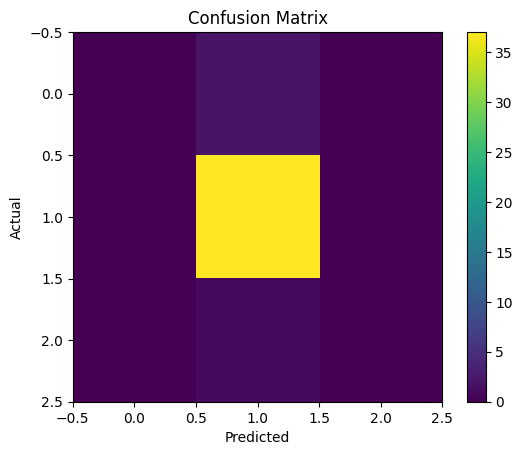

In [230]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


Predict for New Student

In [231]:
def predict_student(CGPA, IQ):
    X_new = np.array([[CGPA, IQ]])
    X_new = scaler.transform(X_new)

    Z = np.dot(X_new, W) + b
    P = softmax(Z)

    label_map = {0: "No", 1: "Maybe", 2: "Yes"}
    print("Probabilities:", P)

    return label_map[np.argmax(P)]


In [232]:
print(predict_student(8.5, 120))


Probabilities: [[9.32831378e-05 8.28320683e-01 1.71586034e-01]]
Maybe


Decision Boundary (Visualization)

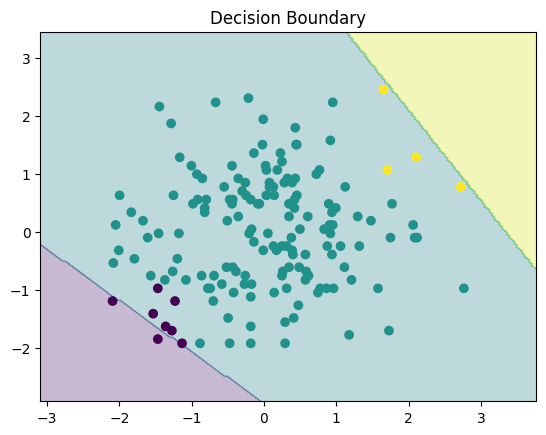

In [233]:
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, W, b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')
plt.title("Decision Boundary")
plt.show()


#Program 3(Iris DataSet)

In [234]:
import seaborn as sns
df=sns.load_dataset('iris')

In [235]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [236]:
df['species']


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [237]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

setosa      → 0
versicolor  → 1
virginica   → 2


In [238]:
df['species']


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [239]:
print(encoder.classes_)


['setosa' 'versicolor' 'virginica']


In [240]:
df=df[['sepal_length','petal_length','species']]

In [241]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [242]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#

In [244]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(multi_class='multinomial')
clf.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [245]:
y_pred=clf.predict(X_test)

In [246]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 1.0


In [247]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


prediction

In [248]:
query=np.array([[3.4,2.7]])
clf.predict_proba(query)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09242380e-01, 1.90157191e-01, 6.00428887e-04]])

In [249]:
clf.predict(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary')

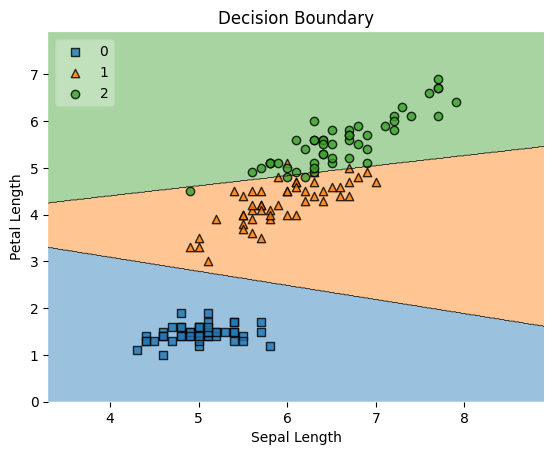

In [251]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf,legend=2)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Decision Boundary')